In [64]:
#importing necessary packages
# 1. Import Libraries
import pandas as pd        # to load and manipilate data
import numpy as np           # to control numerical operation
import matplotlib as mpl
import matplotlib.pyplot as plt

In [65]:
# get RF data as input data
train=pd.read_csv("Random_Forest_dataset (1).csv")
print(train.shape)

(22, 12)


In [98]:
train.head(5)

,Passsages,Age,SibSp,Parch,Fare,Pclass_,Pclass_3,"Name_Allen, Mr.",Name_Andersson,"Name_Beesley, A",...,Ticket_PC 17599,Ticket_STON/02,Ticket_pp 9549,Cabin_C123,Cabin_C85,Cabin_D56,Cabin_E46,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2,38.0,1,0,71.2833,True,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
3,4,35.0,1,0,53.1000,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,5,35.0,0,0,8.0500,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [67]:
#checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train
Pclass,20
Age,3
Cabin,18


In [68]:
#filling missing Age values with mean
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [69]:
#filling missing Cabin values with mode
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode() [0])

In [70]:
#filling missing embark values with mode
train["Cabin"] = train["Cabin"].fillna(train["Cabin"].mode() [0])

In [71]:
train["Pclass"] = train["Pclass"].apply(str)

In [96]:
#Getting Dumming from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    train.head()

In [95]:
train.head()

,Passsages,Age,SibSp,Parch,Fare,Pclass_,Pclass_3,"Name_Allen, Mr.",Name_Andersson,"Name_Beesley, A",...,Ticket_PC 17599,Ticket_STON/02,Ticket_pp 9549,Cabin_C123,Cabin_C85,Cabin_D56,Cabin_E46,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2,38.0,1,0,71.2833,True,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
3,4,35.0,1,0,53.1000,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,5,35.0,0,0,8.0500,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [74]:
Labels = train.pop("Survived")

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, Labels, test_size=0.25)

In [99]:
from sklearn.ensemble import RandomForestClassifier?
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the 

In [100]:
y_pred = rf.predict(x_test)

In [86]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC:", roc_auc)

ROC AUC: 0.75


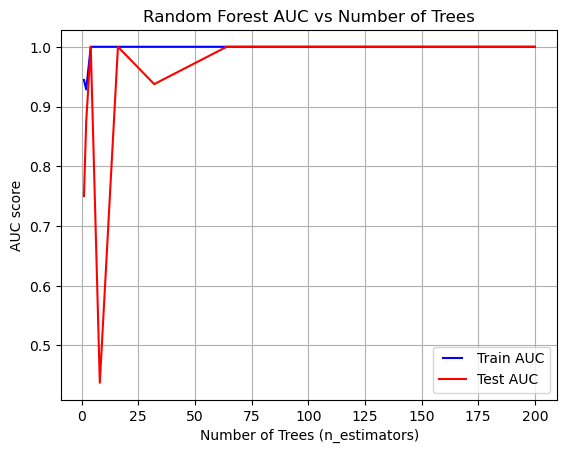

In [92]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    
    # Train ROC AUC
    train_pred_proba = rf.predict_proba(x_train)[:, 1]  # probabilities, not labels
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred_proba)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    # Test ROC AUC
    test_pred_proba = rf.predict_proba(x_test)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred_proba)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
Line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
Line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={Line1: HandlerLine2D(numpoints=2)})
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("AUC score")
plt.title("Random Forest AUC vs Number of Trees")
plt.grid(True)
plt.show()